# <center>Time Series Forecasting of Sales</center>

Forecasting the monthly sales of a XYZ company using time series modeling techniques. The dataset spans from January 1964 to September 1972, recording monthly sales figures. Accurate forecasting of sales is essential for strategic planning in production, inventory, and marketing. The inherent seasonality and trend observed in the data make it a suitable candidate for advanced time series models.

The XYZ company aims to improve its operational efficiency by forecasting future sales accurately. Relying on historical monthly sales data, the objective is to:

- Identify patterns such as trend and seasonality in the sales data.
- Build and evaluate ARIMA and SARIMA models.
- Generate sales forecasts for future months based on historical trends.

The key challenge is to model the time series behavior of the data appropriately, taking into account any seasonal spikes (e.g., holiday sales) and long-term trends, and to forecast sales for future months to support data-driven decision-making.

* ARIMA - Auto-Regressive Integrated Moving Average
* SARIMA - Seasonal Autoregressive Integrated Moving Average

## Dataset and Objective:

```Objective:```
* Use time series concepts to forecast sales
* The dataset is monthly sales of XYZ from year 1964 to 1972

The data contains 2 columns:

- **month:** contains the month data
- **Perrin Freres monthly XYZ sales millions:** contains the monthly champagne sales values in millions


## Steps to achieve the objective:

0. Importing Necessary Libraries
1. Loading and Preprocessing of Dataset (Time series data)
2. Visualize the Time Series Data
3. Check the stationarity of time series data
4. If not stationary  -- > Make the time series data stationary
5. Plot the Correlation and AutoCorrelation Charts
6. Construct the ARIMA Model or Seasonal ARIMA based on the data
7. Use the model to make predictions

## Importing Necessary Libraries:

In [1]:
# Importing libraries:

import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Task 1 : Load the dataset and perform preliminary EDA (Exploratory Data Analysis) with key observations and insights-  (weightage - 40 marks)

#### 1.1. Loading and Pre-processing Dataset: (weightage - 5 marks) (AE)

In [2]:
# Reading sales data

def load_the_dataset():
    try:
        #code starts here
        df = pd.read_csv("sales_data.csv")
        #df['Perrin Freres monthly champagne sales millions ?64-?72'] = df['Perrin Freres monthly champagne sales millions ?64-?72'].astype(float)
        return df
    except :
        print("File not found. Please check the file path.")
        #code ends here

# store the result of the dataset
sales=load_the_dataset()
sales.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


#### T1.2  Rename columns for clarity (Month, Sales) (weightage - 5 marks) (AE)

In [4]:
def rename_columns(df):
    """
    Renames the columns of the DataFrame to more meaningful names.

    Parameters:
    df (pd.DataFrame): Original DataFrame with unnamed or generic columns.
    
    
    """
    #code starts here
    #pdf = df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'})
    df.columns = ['Month','Sales']
    
    # code ends here
    return df
sales = rename_columns(sales)
sales.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


#### T1.3 Checking Dataset Shape and Missing Values (weightage - 5 marks) (AE)

In [4]:
def check_dataset_shape_and_nulls(df):
    """
    Prints the shape of the dataset and the count of missing (NaN) values in each column.

   """
    # code starts here
    
    shape = df.shape
    missing_values = df.isnull().sum()
    return ((shape, missing_values))
    # code ends here
    
check_dataset_shape_and_nulls(sales)


((105, 2),
 Month    0
 Sales    0
 dtype: int64)

#### T1.4 convert the 'Month' column to datetime format.  (weightage - 5 marks) (AE)

In [5]:
def convert_month_to_datetime(df):
        
    # Convert 'Month' column to datetime
    #code starts here (use errors='coerce')
   
    df["Month"] = pd.to_datetime(df['Month'],errors='coerce')
    # code ends here   
    return df.dtypes
convert_month_to_datetime(sales)

Month    datetime64[ns]
Sales             int64
dtype: object

#### T1.5 Set Month column as the index of the DataFrame to prepare it for time series (weightage - 5 marks) (AE)

In [6]:
def set_column_as_index(df, column_name):
    #code starts here
    df.set_index(column_name, inplace=True)
    # return first 5 observations
    return df.head()
    # code ends here
set_column_as_index(sales,'Month')

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


#### T1.6 Plotting for 2 years monthly sales -- to check seasonality: (weightage - 5 marks)  AE

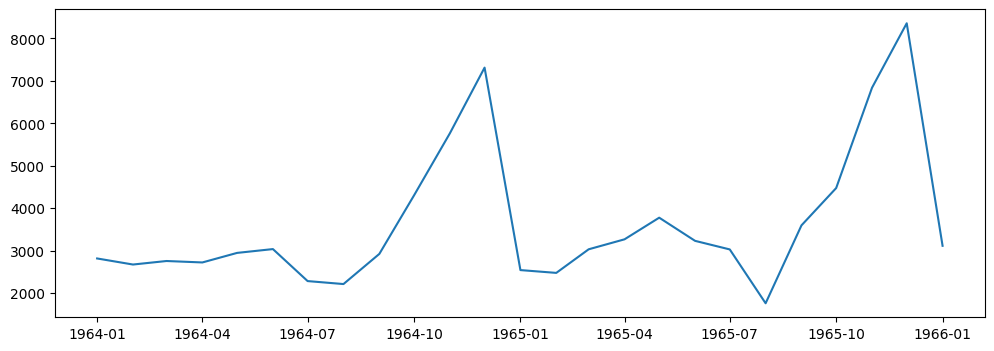

In [7]:
def get_sales_subset(data, start_date, end_date):
    """
    Filters the sales data for the specified date range .

    Parameters:
    - data (pd.DataFrame): Time series DataFrame with datetime index.
    - start_date (str): Start date in 'YYYY-MM-DD' format.
    - end_date (str): End date in 'YYYY-MM-DD' format.

    """
    # code starts here
    subset = data.loc[start_date:end_date]
    # create plot with figsize : (12,4)
    #do not change the given below code
    plt.figure(figsize=(12, 4))
    plt.plot(subset['Sales'], label='Monthly Sales')
    # code ends here
    return subset
start_date = '1964-01-01'
end_date = '1966-01-01'
subset = get_sales_subset(sales, start_date, end_date)

#### Expected output
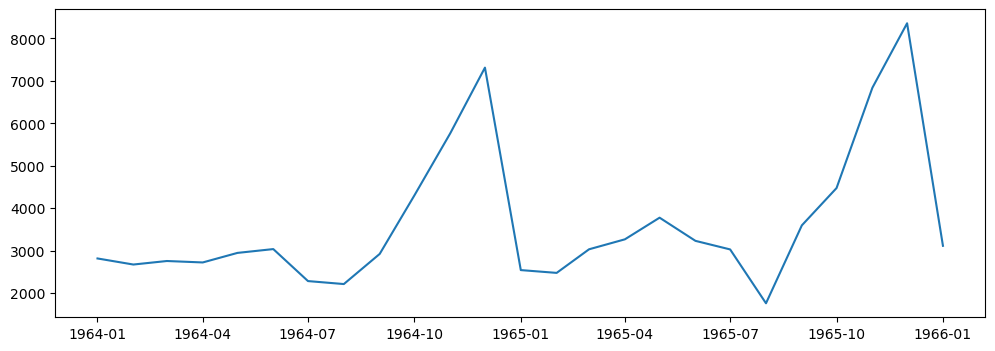

#### T1.7. Stationarity Checking: (weightage - 10 marks) AE

```A stationary time series is one whose statistical properties, such as mean and variance, remain constant over time.```

```Non-stationary time series may exhibit trends or seasonality, making it challenging to model and forecast accurately.```

**Here are two popular methods for checking stationarity and their key points:**

1. **Visual Incpection:**
    
        Visual Incpection can provide an overview by plotting the time-series data and visually inspectc for trends or seasonality.

2. **Statistical Test:**

There are 2 statistical tests to check whether the time series is stationary or not?:
* **ADF - Augmented Dickey-Fuller Test**
* **Detrending/Differencing**

    

```Augmented Dickey-Fuller test to check if our data is stationary or not.```

**Process to conduct the ADF Test**:

- **Method:** A statistical hypothesis test that assesses the presence of a unit root in a univariate time series, indicating non-stationarity.

- **Preferred condition**:
    1. Rigorous statistical test for stationarity.
    2. Suitable for identifying both trend and seasonality in the data.
    
- **Considerations:**
    1. **Null hypothesis (H0):** The time series has a unit root and is non-stationary.
    2. **Alternate hypothesis (H1):** The time series does not have a unit root and is stationary.

    ```A low p-value (typically below a significance level like 0.05) indicates rejection of the null hypothesis, suggesting stationarity.```

```The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a [unit root](https://en.wikipedia.org/wiki/Unit_root) at some level of confidence.```

In [ ]:
# from statsmodels.tsa.stattools import adfuller

if p value is less than 0.05 , then print "The series is stationary" or print "The series is NOT stationary".

In [8]:
# Defining a function to check the stationarity:

def check_stationarity(ts):
    # code starts here
    adf_result = adfuller(ts.dropna())
    if adf_result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary")
           
    # code ends here
check_stationarity(sales)

The series is NOT stationary


* adfuller gives 5 values: ```['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used', 'critical_value']```
* Here, the ```most important is p-value```.


If result <=0.05, then print "strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary" otherwise print "weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary "

In [9]:
#Ho: It is non stationary
#H1: It is stationary

# add  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
def adfuller_test(sales):
    # code starts here
    adf_result = adfuller(sales.dropna())
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(adf_result[0:4], labels):
        print(f'{label} : {value}')
    if adf_result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), the series is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
    # code ends here
# Use above designed function:

adfuller_test(sales['Sales'])

ADF Test Statistic : -1.8335930563276226
p-value : 0.3639157716602452
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


### T2. Model Building and Evaluation (weightage - 40 marks) ME

#### T2.1 Making Time Series Data --> Stationary:  and Check ADF-Test again on new shifted sales information (weightage -10 marks) ME

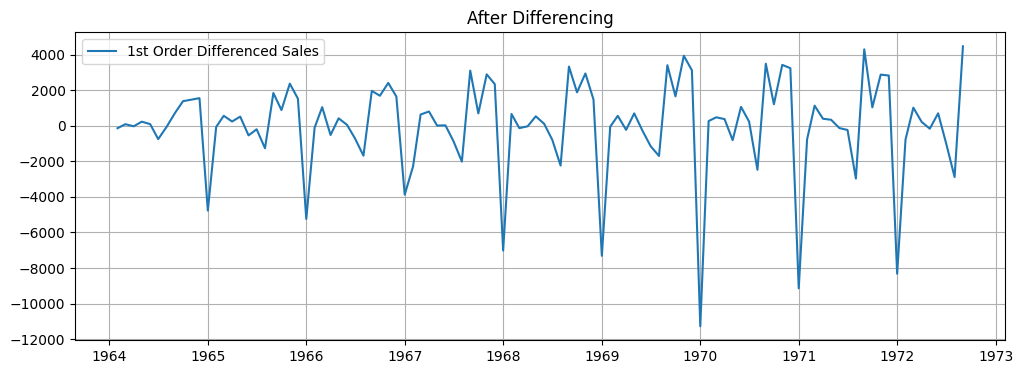

In [10]:
# calculate first order difference
sales_diff = sales['Sales'].diff().dropna()
plt.figure(figsize=(12, 4))
plt.plot(sales_diff, label='1st Order Differenced Sales')
plt.title('After Differencing')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
adf_result = adfuller(sales_diff)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

if adf_result[1] <= 0.05:
    print("The differenced series is stationary")
else:
    print("The differenced series is still non-stationary")

ADF Statistic: -7.189896448050998
p-value: 2.519620447387099e-10
Critical Value (1%): -3.503514579651927
Critical Value (5%): -2.893507960466837
Critical Value (10%): -2.583823615311909
The differenced series is stationary


#### T2.2. Build the time series model - Arima, Sarima and Sarimax . Then Evaluate performance using metrics like MAE, RMSE, MAPE, and visual diagnostics (e.g., residual plots, ACF/PACF of residuals). (weightage - 20 marks) ME

* ARIMA model is ```a class of linear models``` that ```utilizes historical values to forecast``` future values. 
* ARIMA stands for ```Autoregressive Integrated Moving Average```, each of which technique contributes to the final forecast.

In [12]:
# train test split 
split_index = int(len(sales) * 0.8)
train = sales[:split_index]
test = sales[split_index:]

In [13]:
# ARIMA(p,d,q)
arima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,0,0))
arima_result = arima_model.fit()

**SARIMA** stands for Seasonal Autoregressive Integrated Moving Average, where each component plays a role in modeling both non-seasonal and seasonal structures in the data:

Autoregressive (AR): Uses past values of the series.

Integrated (I): Applies differencing to make the series stationary.

Moving Average (MA): Uses past forecast errors.

Seasonal terms (S): Adds seasonal AR, I, MA components to capture repeating patterns (e.g., monthly or quarterly cycles)

In [14]:
# SARIMA(p,d,q)(P,D,Q,s) -- s=12 for monthly data
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

#### SARIMAX

```(p,d,q), (P, D, Q, s)```

* **p - Autoregressive Order** -- represents the numberof lag observations included in the model.
* **d - Integrated Order** -- represents the number of differences neede to make the time series stationary.
* **q - Moving Average Order** -- specifies the size of the moving avaerage window -- It represents the number of lag foreacst errors in the prediction equation.

* **P - Seasonal Autoregressive Order** -- similar to p -- but for the seasonal component -- represents the numberof lag observations at seasonal intervals in the autoregressive part of the model.
* **D - Seasonal Integrated Order** -- similar to d -- but for the seasonal component -- represents the number of differences needed to make the seasonal part of the time series stationary.
* **Q - seasonal Moving Average Order** -- similar to q -- but for the seasonal component -- specifies the size of the seasonal moving avaerage window.

* **s - Seasonal Periodicity** --defines the number of time steps in a seasonal cycle -- here data has a yearly seasonality -- "s" will be 12 for monthly data.

In [15]:
# SARIMAX
exog_train = np.arange(len(train)).reshape(-1, 1)
exog_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)

sarimax_model = SARIMAX(train, exog=exog_train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarimax_result = sarimax_model.fit()

#### T2.3. Prediction Outcomes (weightage - 10 marks) ME

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
arima_forecast = arima_result.predict(start=len(train), end=len(train)+len(test)-1)
sarima_forecast = sarima_result.predict(start=len(train), end=len(train)+len(test)-1)
sarimax_forecast = sarimax_result.predict(start=len(train), end=len(train)+len(test)-1, exog=exog_test)

def evaluate_model(true, predicted, model_name):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / true)) * 100

    print(f"{model_name} Evaluation:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAPE : {mape:.2f}%")
    
    return mae, rmse, mape

evaluate_model(test, arima_forecast, "ARIMA")
evaluate_model(test, sarima_forecast, "SARIMA")
evaluate_model(test, sarimax_forecast, "SARIMAX")


ARIMA Evaluation:
MAE  : 2368.79
RMSE : 3018.73
MAPE : nan%
SARIMA Evaluation:
MAE  : 1024.03
RMSE : 1187.64
MAPE : nan%
SARIMAX Evaluation:
MAE  : 1023.70
RMSE : 1187.30
MAPE : nan%


(1023.6974583745111, np.float64(1187.3033554390722), nan)

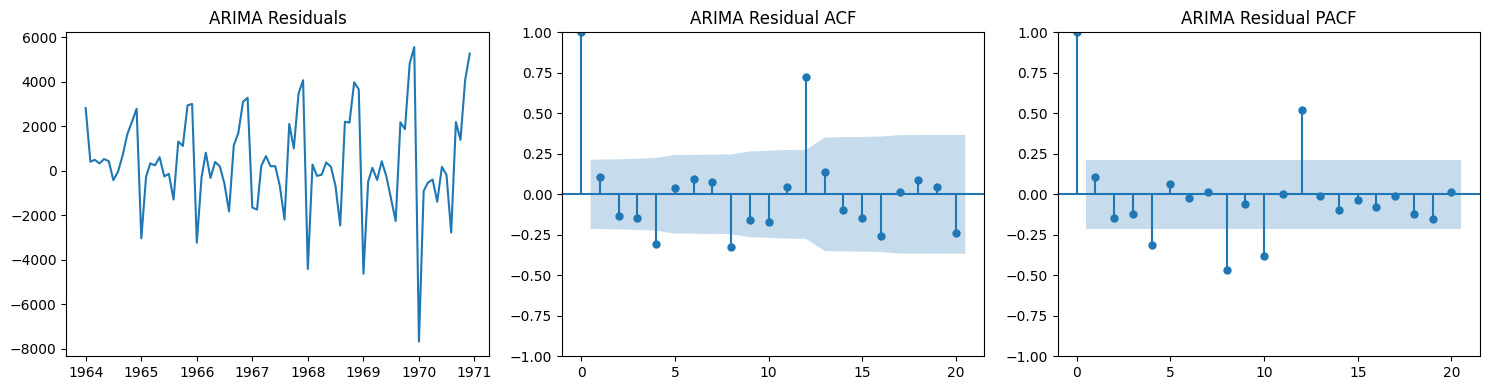

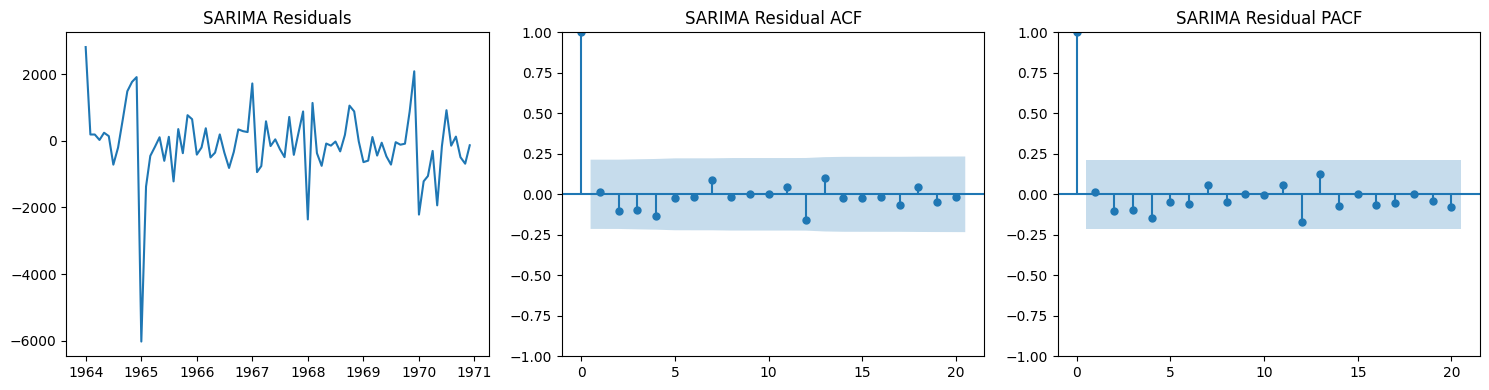

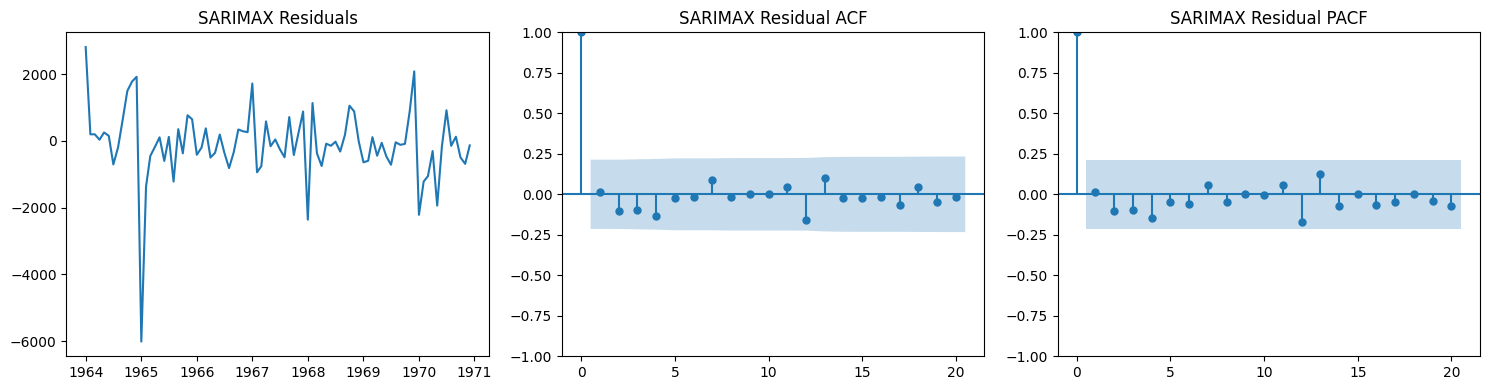

In [17]:
def plot_diagnostics(fitted_model, model_name):
    residuals = fitted_model.resid

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    axes[0].plot(residuals)
    axes[0].set_title(f'{model_name} Residuals')

    plot_acf(residuals, ax=axes[1], lags=20)
    axes[1].set_title(f'{model_name} Residual ACF')

    plot_pacf(residuals, ax=axes[2], lags=20)
    axes[2].set_title(f'{model_name} Residual PACF')
    
    plt.tight_layout()
    plt.show()

plot_diagnostics(arima_result, "ARIMA")
plot_diagnostics(sarima_result, "SARIMA")
plot_diagnostics(sarimax_result, "SARIMAX")

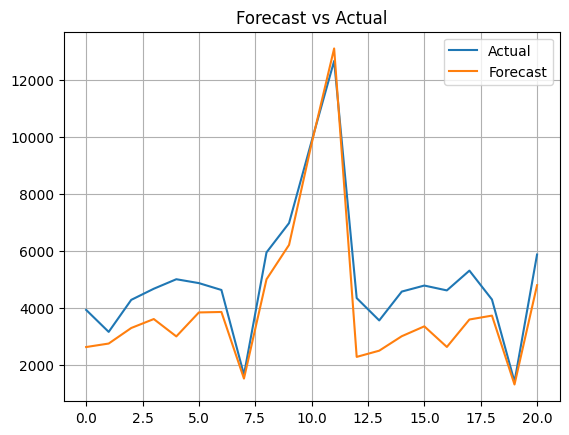

In [18]:
# forecast vs actual 
plt.plot(test.values, label='Actual')
plt.plot(sarimax_forecast.values, label='Forecast')
plt.legend()
plt.title("Forecast vs Actual")
plt.grid(True)
plt.show()

### T3. Summarize the findings of the analysis and draw conclusions with PPT / PDF.	(weightage - 20 marks) ME